## Trabajo final de estadistica

Para mejorar la reproducibilidad de los resultados experimentales, este trabajo presenta una metodología estadística rigurosa. para comprobar si dos muestras tienen diferencia significativas.

para esto planteo las siguientes hipotesis:
$$h_{o} = u_{x} != u_{y}$$
$$h_{1} = u_{x} == u_{y}$$

### Requerimiento:
- Jupyter Notebook
- irKernell para jupyter
- ggplot2 libreria
- reshape libreria
- plyr libreria

In [3]:
library(ggplot2)
library(reshape)
library(plyr)

Estos dataset son los tiempos de ejecucion obtenidos luego de iterar 100 veces el algoritmo de matmul.

In [11]:
old_layout <- read.csv('old_layout.csv', header=F, sep="\t")
old_layout <- old_layout$V1
new_layout <- read.csv('new_layout.csv', header=F, sep="\t")
new_layout <- new_layout$V1

primero verifico con una gráfica si mis datos se parecen a una distribucion normal, como se ve en la figura.

Using  as id variables


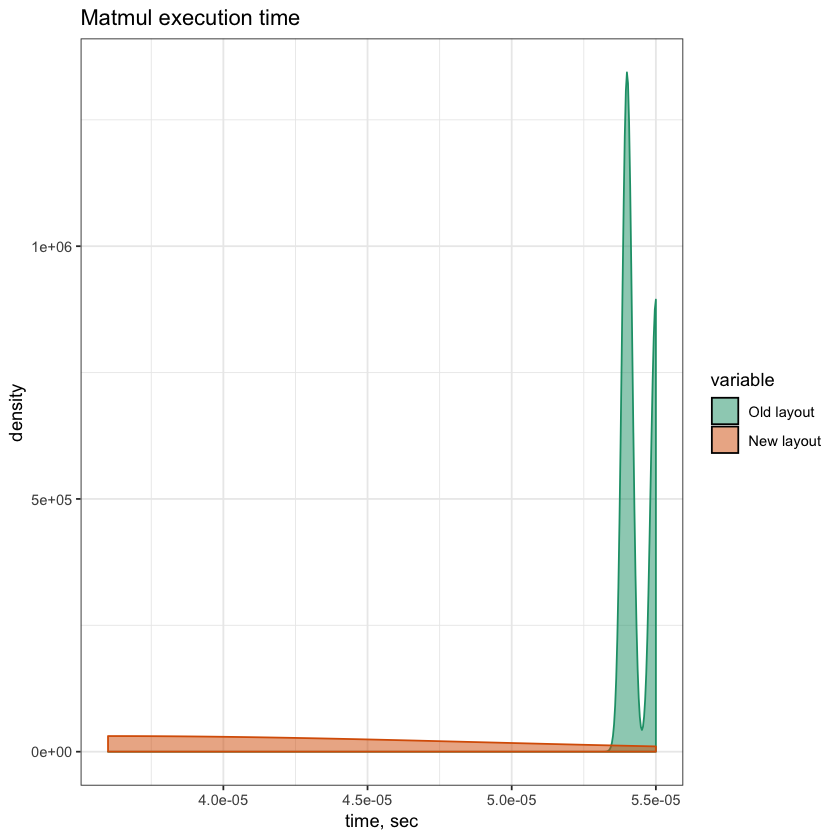

In [31]:
ds <- as.data.frame(cbind(old_layout[1:100], new_layout[1:100]))
colnames(ds) <- c('old_layout', 'new_layout')
ds.melt <- melt(ds)
cdat <- ddply(ds.melt, "variable", summarise, rating.mean=mean(value))

p <- ggplot(ds.melt, aes(x=value, fill=variable, color=variable)) +
  geom_density(alpha=.5) +
  ggtitle("Matmul execution time") +
  guides(fill = guide_legend(override.aes = list(colour = NULL))) +
  scale_fill_brewer(palette="Dark2", labels=c("Old layout", "New layout")) +
  scale_color_brewer(palette="Dark2",guide=FALSE) + 
  xlab("time, sec") + 
  theme_bw() 

print(p)


como no se parece a una y estoy deseperado para que sea normal hago un test de Kolmogorov-Smirnov, para ver si por si acaso me da que si, pero ambos p_value son menores que mi alfa de 0.01, asi que no se distribuyen normal.

In [29]:
ks_old <- ks.test(ds$old_layout , "pnorm", mean(ds$old_layout), sd(ds$old_layout))
ks_new <- ks.test(ds$new_layout , "pnorm", mean(ds$new_layout), sd(ds$new_layout))

print(ks_old)
print(ks_new)


Warning message in ks.test(ds$old_layout, "pnorm", mean(ds$old_layout), sd(ds$old_layout)):
“ties should not be present for the Kolmogorov-Smirnov test”Warning message in ks.test(ds$new_layout, "pnorm", mean(ds$new_layout), sd(ds$new_layout)):
“ties should not be present for the Kolmogorov-Smirnov test”


	One-sample Kolmogorov-Smirnov test

data:  ds$old_layout
D = 0.39172, p-value = 9.392e-14
alternative hypothesis: two-sided


	One-sample Kolmogorov-Smirnov test

data:  ds$new_layout
D = 1, p-value < 2.2e-16
alternative hypothesis: two-sided



como tengo que hacer algo de lo que me enseñaron hago el t-test y me da un alfa muy pequeño asi que rechazo la hipotesis nula.

In [33]:
tt_ds <- t.test(old_layout, new_layout, conf.level = 0.99)
print(tt_ds)


	Welch Two Sample t-test

data:  old_layout and new_layout
t = 373.71, df = 99, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
99 percent confidence interval:
 1.827068e-05 1.852932e-05
sample estimates:
mean of x mean of y 
 5.44e-05  3.60e-05 



## Conclusión:

me retiro de la estadistica de benchmark, porque no mi muestra no se distribuye normal y mi t-test me rechaza h0 asi que puede ser cualquier cosa

Bye

By Roberto Carrasco